Griffin Shelor\
22-4-2024

# In-class Exercises: Supervised Learning 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns; sns.set()

### We'll use the famous 'iris' dataset (of flower species) for this in-class exercise. This is a built-in `seaborn` dataset.

In [2]:
# Load data
iris = sns.load_dataset('iris')

# Features and targets
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Q1. Print the unique species names.

In [3]:
## printing unique species names
y_iris.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Q2. We often use _pairplots_ to examine the correlation between different features. Run the `sns.pairplot(...)` command on the iris `DataFrame` with `hue='species'`. 

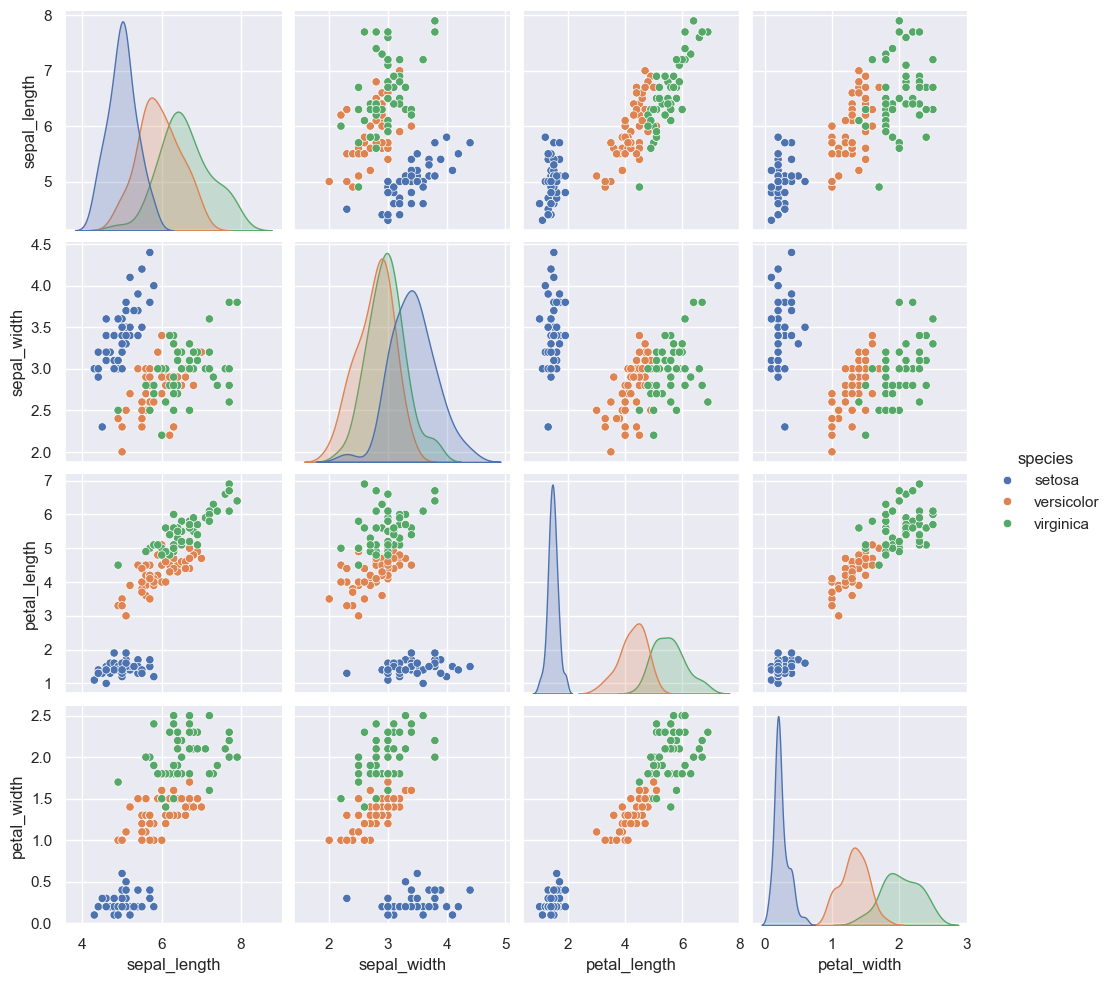

In [4]:
## creating pairplot based on species
sns.pairplot(iris, hue = 'species');

### Q3. Use `sns.lmplot(...)` to plot two of the features that appear highly correlated in Q2, again with `hue='species'`.

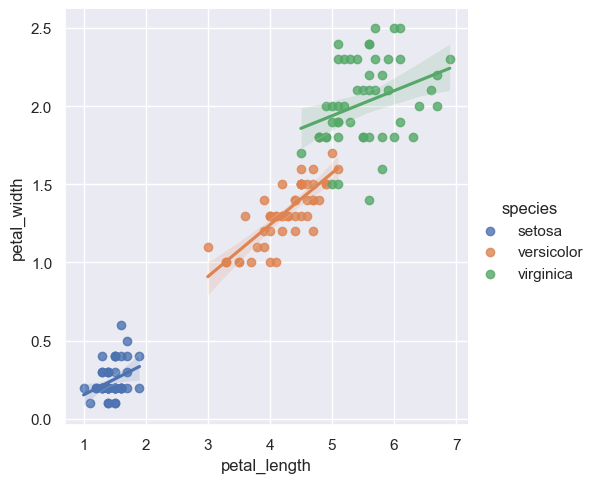

In [5]:
## petal length and petal_width appear to be highly correlated
sns.lmplot(x = 'petal_length', y = 'petal_width', hue = 'species', data = iris);

### Q4. Split the dataset `X_iris, y_iris` into a training set and a testing set using a `train_size` of 0.75 and a `random_state` of 10.

In [6]:
## splitting the data into training and testing
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, train_size=0.75, test_size=0.25, random_state=10)

### Q5. Fit the training data using a `KNeighborsClassifier` with K=5. What is the accuracy score of the model when applied to the testing data?

In [7]:
# Fit the model to the training set
model_knn = KNeighborsClassifier(n_neighbors = 5)
model_knn.fit(Xtrain, ytrain)

# Calculate model predictions for the testing set
y_model = model_knn.predict(Xtest)

# Examine the accuracy of the model
accuracy_score(ytest, y_model)

0.9736842105263158

### Q6. Fit the training data using a `GaussianNB` classifier. What is the accuracy score of the model when applied to the testing data?

In [8]:
# Instantiate model
model_gb = GaussianNB()

# fit model to training data, predict on testing data
y_model_gb = model_gb.fit(Xtrain, ytrain).predict(Xtest)

# compute accuracy score
accuracy_score(ytest, y_model_gb)

1.0

### Q7. Plot the confusion matrix from the `KNeighborsClassifier`.

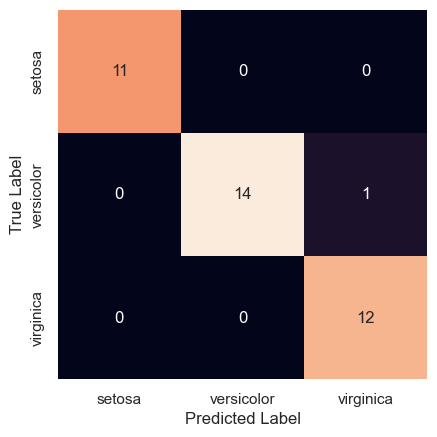

In [9]:
# Calculate and plot confusion matrix
mat = confusion_matrix(ytest, y_model)

# plot as a seaborn heatmap
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = np.unique(ytest), yticklabels = np.unique(ytest));
plt.ylabel('True Label')
plt.xlabel('Predicted Label');

### Q8. Plot the confusion matrix from the `GaussianNB` classifier.

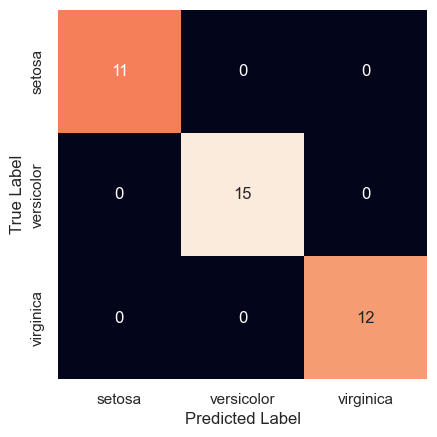

In [10]:
# Calculate and plot confusion matrix
mat_gb = confusion_matrix(ytest, y_model_gb)

# plot as a seaborn heatmap
sns.heatmap(mat_gb, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = np.unique(ytest), yticklabels = np.unique(ytest));
plt.ylabel('True Label')
plt.xlabel('Predicted Label');

### Save your notebook and output an html version. To receive credit for this in-class exercise upload both the .html and .ipynb files.